<h1> 17장 시퀀스 배열로 다루는 순환 신경망(RNN)</h1> <br>
애플의 시리, 삼성의 빅스비 처럼 대화형 인공지능이 많이 나오고 있는데 인공지능이 문장을 듣고 이해를 한다는 건 이미 학습(train)했다는 것!<br>
그런데 사람이 말하는 걸 듣고 이해하려면 과거의 학습했던 데이터와 나중에 입력된 데이터의 관계를 고려해야함<br>
이 문제를 해결하기 위해 <strong>순환 신경망(Recurrent Neural Network)</strong>!<br>
순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법.<br>
그리고 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치르 줘서 다음 데이터로 넘어감!<br>
이때 입력값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것 처럼 보여 순환 신경망이라 부름.

In [2]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 테스트셋 20%
(X_train,Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 5s 2us/step


로이터 뉴스 데이터를 받아 온다음에  num_words=1000을 통해 빈도 수가 1~1000위까지인 단어만 뽑아오게 함.

In [3]:
# 0부터 세기 때문에 1을 더함
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
# 단어가 아니라 [1,2,2,8,43,...] 처럼 숫자가 나옴
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

각 기사의 단어 수가 제각각 다르므로 단어의 숫자를 맞춰야 하기 때문에 데이터 전처리 함수 sequence를 다음과 같이 사용! <br>
maxlen=100의 의미는 단어 수를 100개로 맞추는 것! y데이터에는 원-핫 인코딩 처리!를 하며 데이터 전처리 과정을 마침.

In [6]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation = 'softmax'))

<strong>Embedding</strong>층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할을 함!<br>
Embedding('불러온 단어의 총 개수', '기사당 단어 수')형식을 사용하여 모델 설정 부분의 맨 처음에 있어야함.<br>
<strong>LSTM</strong>은 RNN에서 기억 값에 대한 가중치를 제어함. LSTM(기사당 단어 수 , 기타옵션)의 형태.<br>

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 13s 1ms/step - loss: 2.6147 - acc: 0.3442 - val_loss: 2.4222 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 11s 1ms/step - loss: 2.3032 - acc: 0.3904 - val_loss: 2.0429 - val_acc: 0.5022
Epoch 3/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.9824 - acc: 0.4967 - val_loss: 1.8266 - val_acc: 0.5499
Epoch 4/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.7599 - acc: 0.5481 - val_loss: 1.7206 - val_acc: 0.5628
Epoch 5/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.6363 - acc: 0.5797 - val_loss: 1.6630 - val_acc: 0.5833
Epoch 6/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.5818 - acc: 0.6048 - val_loss: 1.6128 - val_acc: 0.5957
Epoch 7/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.4935 - acc: 0.6215 - val_loss: 1.5644 - val_acc: 0.6100
Epoch 8

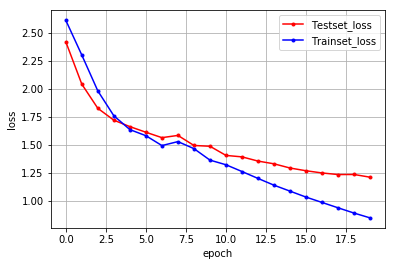

In [8]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=100)

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test,y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

테스트셋에 대한 정확도가 0.6990을 보이고 있음. 테스트 오차가 상승하기 전까지 학습이 과적합 직전의 최적학습!